<a href="https://colab.research.google.com/github/rachelcynthia/DeepLearning-Bootcamp/blob/master/dphi_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression on Bostion Housing dataset using Deep Learning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load the Data

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Boston_Housing/Training_set_boston.csv")

View the Data

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,12.0
1,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,19.9
2,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,19.4
3,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29,13.4
4,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,18.2


Separation of input and output 

In [5]:
x = data.drop('MEDV',axis=1)
y = data.MEDV

Splitting into test and training set

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Find number of input features

In [42]:
n_features =x.shape[1]
n_features

13

Training our model 

Import necessary libraries

In [43]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from numpy.random import seed
import tensorflow

Define the model

In [44]:
model = Sequential()
model.add(Dense(10,activation='relu',input_shape=(n_features,)))
model.add(Dense(8,activation='relu'))
model.add(Dense(1))

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 237
Trainable params: 237
Non-trainable params: 0
_________________________________________________________________


Compile the model

In [46]:
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(0.01)

In [47]:
model.compile(loss='mean_squared_error',optimizer=optimizer)

Fitting the model

In [48]:
import random
seed_value = random.randint(12,200)

In [49]:
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

In [50]:
import numpy as np
np.random.seed(seed_value)

In [51]:
tensorflow.random.set_seed(seed_value)

Train the model

In [52]:
model.fit(x_train,y_train,epochs=10,batch_size=30,verbose=1)

Epoch 1/10
11/11 [==============================] - 0s 1ms/step - loss: 7467.7012
Epoch 2/10
11/11 [==============================] - 0s 1ms/step - loss: 131.9737
Epoch 3/10
11/11 [==============================] - 0s 1ms/step - loss: 180.1714
Epoch 4/10
11/11 [==============================] - 0s 1ms/step - loss: 111.2336
Epoch 5/10
11/11 [==============================] - 0s 1ms/step - loss: 315.3596
Epoch 6/10
11/11 [==============================] - 0s 1ms/step - loss: 142.0682
Epoch 7/10
11/11 [==============================] - 0s 1ms/step - loss: 254.8340
Epoch 8/10
11/11 [==============================] - 0s 1ms/step - loss: 193.8430
Epoch 9/10
11/11 [==============================] - 0s 1ms/step - loss: 176.2647
Epoch 10/10
11/11 [==============================] - 0s 1ms/step - loss: 174.3174


Evaluate the model using test set

In [53]:
model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 2ms/step - loss: 92.9679


92.96791076660156

Function for Plotting the model

In [54]:
def plot_the_loss_curve(epochs,rmse):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")
  plt.plot(epochs,rmse,label="loss")
  plt.legend()
  plt.show()

**Hyperparameter Tunning**

**1. Learning Rate - train with learning rate =0.1**

In [58]:
optimizer=RMSprop(0.1)
model.compile(loss='mean_squared_error',optimizer=optimizer)

fit and evaluate the model

In [59]:
history = model.fit(x_train,y_train,epochs=10,batch_size=30,verbose=1)
model.evaluate(x_test,y_test)

Epoch 1/10
11/11 [==============================] - 0s 1ms/step - loss: 134066.7500
Epoch 2/10
11/11 [==============================] - 0s 1ms/step - loss: 1128.2797
Epoch 3/10
11/11 [==============================] - 0s 1ms/step - loss: 440.5921
Epoch 4/10
11/11 [==============================] - 0s 1ms/step - loss: 258.5807
Epoch 5/10
11/11 [==============================] - 0s 1ms/step - loss: 208.8600
Epoch 6/10
11/11 [==============================] - 0s 1ms/step - loss: 172.4944
Epoch 7/10
11/11 [==============================] - 0s 1ms/step - loss: 136.9435
Epoch 8/10
11/11 [==============================] - 0s 1ms/step - loss: 95.6370
Epoch 9/10
11/11 [==============================] - 0s 1ms/step - loss: 184.4663
Epoch 10/10
3/3 [==============================] - 0s 3ms/step - loss: 64.5916


64.59159088134766

This is worse than what we got before.

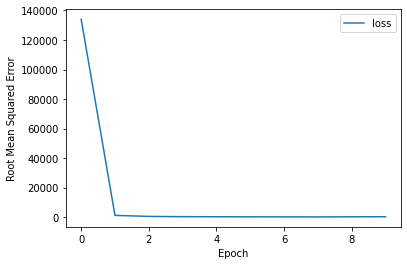

In [60]:
plot_the_loss_curve(history.epoch,history.history['loss'])

Check for learning rate =0.0001

Epoch 1/10
11/11 [==============================] - 0s 1ms/step - loss: 45.2180
Epoch 2/10
11/11 [==============================] - 0s 1ms/step - loss: 45.0793
Epoch 3/10
11/11 [==============================] - 0s 2ms/step - loss: 45.0753
Epoch 4/10
11/11 [==============================] - 0s 1ms/step - loss: 45.0168
Epoch 5/10
11/11 [==============================] - 0s 1ms/step - loss: 44.9975
Epoch 6/10
11/11 [==============================] - 0s 1ms/step - loss: 44.9417
Epoch 7/10
11/11 [==============================] - 0s 1ms/step - loss: 44.9598
Epoch 8/10
11/11 [==============================] - 0s 1ms/step - loss: 44.8782
Epoch 9/10
11/11 [==============================] - 0s 1ms/step - loss: 44.8576
Epoch 10/10
3/3 [==============================] - 0s 2ms/step - loss: 30.4611


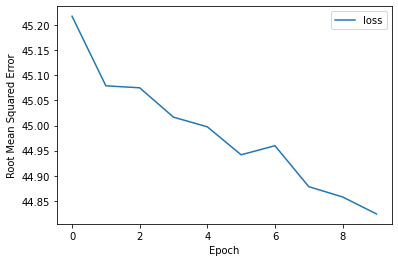

In [66]:
optimizer=RMSprop(0.0001)
model.compile(loss='mean_squared_error',optimizer=optimizer)
history = model.fit(x_train,y_train,epochs=10,batch_size=30,verbose=1)
model.evaluate(x_test,y_test)
plot_the_loss_curve(history.epoch,history.history['loss'])

This has a better learning curve and gradual decrease

**2. EPOCHS**

In [74]:
learning_rate=0.01
epochs=10
optimizer=RMSprop(learning_rate)
model.compile(loss="mean_squared_error",optimizer=optimizer)
history=model.fit(x_train,y_train,epochs=epochs,batch_size=30,verbose=None)
model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 3ms/step - loss: 34.6567


34.65667724609375

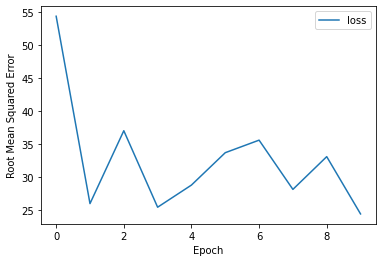

In [75]:
plot_the_loss_curve(history.epoch,history.history['loss'])

Now try for higher number of epochs

In [76]:
learning_rate=0.01
epochs=100
optimizer=RMSprop(learning_rate)
model.compile(loss="mean_squared_error",optimizer=optimizer)
history=model.fit(x_train,y_train,epochs=epochs,batch_size=30)
model.evaluate(x_test,y_test)

Epoch 1/100
11/11 [==============================] - 0s 1ms/step - loss: 52.3531
Epoch 2/100
11/11 [==============================] - 0s 1ms/step - loss: 25.4919
Epoch 3/100
11/11 [==============================] - 0s 1ms/step - loss: 36.7848
Epoch 4/100
11/11 [==============================] - 0s 1ms/step - loss: 25.0315
Epoch 5/100
11/11 [==============================] - 0s 1ms/step - loss: 26.1911
Epoch 6/100
11/11 [==============================] - 0s 1ms/step - loss: 34.3968
Epoch 7/100
11/11 [==============================] - 0s 1ms/step - loss: 34.9161
Epoch 8/100
11/11 [==============================] - 0s 1ms/step - loss: 26.5182
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 32.8976
Epoch 10/100
11/11 [==============================] - 0s 1ms/step - loss: 23.7546
Epoch 11/100
11/11 [==============================] - 0s 990us/step - loss: 32.2333
Epoch 12/100
11/11 [==============================] - 0s 1ms/step - loss: 31.4001
Epoch 13/100
11/11 [===

20.901098251342773

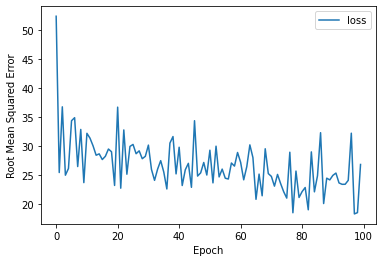

In [77]:
plot_the_loss_curve(history.epoch,history.history['loss'])

**3.Batch Size**

In [78]:
learning_rate=0.01
epochs=10
batch_size=5
optimizer=RMSprop(learning_rate)
model.compile(loss="mean_squared_error",optimizer=optimizer)
history=model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,verbose=3)
model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 2ms/step - loss: 22.5022


22.50218391418457

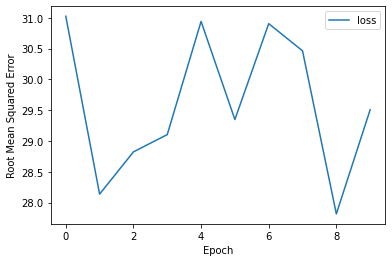

In [79]:
plot_the_loss_curve(history.epoch,history.history['loss'])